# Counter Striker Analytics

## 1. hltv 웹페이지를 통해 데이터 크롤링
팀별 성적, 선수별 성적

In [104]:
import math
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
from bs4 import BeautifulSoup as bs
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [106]:
import html5lib

In [107]:
from sklearn.svm import SVC

Response 200 이 떠야 정상적으로 크롤링됨.

다른 숫자가 뜨면 헤더 지정해주기. 크롬 개발자도구에서 확인 가능

In [108]:
#Response 403 에러 뜰때는 헤더 확인하고 설정해주기
headers = {"user-agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36"}
r = requests.get("https://www.hltv.org/stats/teams",headers=headers)
r

<Response [200]>

In [109]:
root = bs(r.content, "html.parser")
table = str(root.find("table"))
teams = pd.read_html(table, header=0)[0]

In [110]:
#바로 데이터 불러오기
table = table.strip("\\n") #strip 함수로 문자 삭제해주기
countries = re.findall('title="(.+)"/>', table)
str(countries)

"['China', 'China', 'Australia', 'Australia', 'Turkey', 'Denmark', 'Brazil', 'France', 'Denmark', 'Europe', 'Bulgaria', 'United States', 'Sweden', 'CIS', 'Brazil', 'Germany', 'Europe', 'Brazil', 'Poland', 'Denmark', 'Brazil', 'Sweden', 'Germany', 'Sweden', 'North America', 'Finland', 'Australia', 'Russia', 'CIS', 'Denmark', 'United States', 'Europe', 'France', 'Poland', 'United States', 'Kazakhstan', 'Sweden', 'United States', 'Romania', 'Russia', 'Spain', 'Finland', 'Poland', 'United States', 'Europe', 'Australia', 'France', 'Russia', 'Kazakhstan', 'United Kingdom', 'Belarus', 'Russia', 'Finland', 'Denmark', 'Poland', 'Germany']"

In [111]:
teams['Country'] = pd.Series(countries) #데이터구조 시리즈로 만들기

In [112]:
#데이터 컬럼 정렬하기
teams.columns = ['Team', 'Maps', 'K/D Differential', 'K/D', 'Rating', 'Country']
teams = teams[['Team','Country','Maps','K/D Differential','K/D','Rating']]

In [113]:
teams

,Team,Country,Maps,K/D Differential,K/D,Rating
0,TYLOO,China,1141,10520,1.11,1.06
1,ViCi,China,683,5507,1.10,1.05
2,Renegades,Australia,933,3430,1.04,1.05
3,ORDER,Australia,656,7310,1.14,1.05
4,Space Soldiers,Turkey,804,6008,1.09,1.05
5,Astralis,Denmark,1073,10675,1.12,1.04
6,FURIA,Brazil,728,6302,1.11,1.04
7,G2,France,1306,3102,1.03,1.04
8,North,Denmark,822,1228,1.02,1.04
9,FaZe,Europe,1064,4375,1.05,1.04


In [114]:
#TYLOO 데이터 삭제
teams = teams.drop([0])
teams

,Team,Country,Maps,K/D Differential,K/D,Rating
1,ViCi,China,683,5507,1.10,1.05
2,Renegades,Australia,933,3430,1.04,1.05
3,ORDER,Australia,656,7310,1.14,1.05
4,Space Soldiers,Turkey,804,6008,1.09,1.05
5,Astralis,Denmark,1073,10675,1.12,1.04
6,FURIA,Brazil,728,6302,1.11,1.04
7,G2,France,1306,3102,1.03,1.04
8,North,Denmark,822,1228,1.02,1.04
9,FaZe,Europe,1064,4375,1.05,1.04
10,Windigo,Bulgaria,673,2114,1.04,1.04


In [115]:
#player 출력
headers = {"user-agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36"}
r1 = requests.get("https://www.hltv.org/stats/players",headers = headers)
r1

<Response [200]>

In [116]:
root1 = bs(r1.content, "html.parser")
root1.prettify()
table1_1 = str(root1.find("table"))
table1_1 = table1_1.strip("\\n")
table1 = root1.find("table")

## +) 다른 데이터는 정상적으로 불러와졌지만, 팀명 부분이 텍스트가 아니라 이미지로 설정되어있어서 팀명을 따로 찾아주는 과정이 추가로 필요했음.

In [117]:
table1 = table1.find("tbody")
table1

<tbody>
<tr>
<td class="playerCol"><img alt="France" class="flag" src="/img/static/flags/30x20/FR.gif" title="France"/><a data-tooltip-id="uniqueTooltipId--1077353916" href="/stats/players/11893/zywoo">ZywOo</a></td>
<td class="teamCol"><a data-tooltip-id="uniqueTooltipId--7768745" href="/stats/teams/9565/vitality"><img alt="Vitality" class="logo" src="https://img-cdn.hltv.org/teamlogo/GAlByJtDTnkgbb9p_71SUL.png?ixlib=java-2.1.0&amp;w=50&amp;s=2838cd78a5ebb5c9fea4c485908e9dbb" title="Vitality"/></a><span class="gtSmartphone-only"><a data-tooltip-id="uniqueTooltipId-2115682874" href="/stats/teams/5639/aaa"><img alt="aAa" class="logo" src="https://img-cdn.hltv.org/teamlogo/HGmdk2iXUb3YresiJR1U6Q.svg?ixlib=java-2.1.0&amp;s=b2be151eb6f1087ea1dff0e0b40dc269" title="aAa"/></a></span></td>
<td class="statsDetail">773</td>
<td class="kdDiffCol won" data-sort="4826" data-sort-method="number">+4826</td>
<td class="statsDetail">1.38</td>
<td class="ratingCol">1.28</td>
</tr>
<tr>
<td class="playe

In [118]:
table2 = table1.find_all('td', {'class':'teamCol'})
table2

[<td class="teamCol"><a data-tooltip-id="uniqueTooltipId--7768745" href="/stats/teams/9565/vitality"><img alt="Vitality" class="logo" src="https://img-cdn.hltv.org/teamlogo/GAlByJtDTnkgbb9p_71SUL.png?ixlib=java-2.1.0&amp;w=50&amp;s=2838cd78a5ebb5c9fea4c485908e9dbb" title="Vitality"/></a><span class="gtSmartphone-only"><a data-tooltip-id="uniqueTooltipId-2115682874" href="/stats/teams/5639/aaa"><img alt="aAa" class="logo" src="https://img-cdn.hltv.org/teamlogo/HGmdk2iXUb3YresiJR1U6Q.svg?ixlib=java-2.1.0&amp;s=b2be151eb6f1087ea1dff0e0b40dc269" title="aAa"/></a></span></td>,
 <td class="teamCol"><a data-tooltip-id="uniqueTooltipId-348611964" href="/stats/teams/4608/natus-vincere"><img alt="Natus Vincere" class="logo" src="https://img-cdn.hltv.org/teamlogo/kixzGZIb9IYAAv-1vGrGev.svg?ixlib=java-2.1.0&amp;s=8f9986a391fcb1adfbfff021b824a937" title="Natus Vincere"/></a><span class="gtSmartphone-only"><a data-tooltip-id="uniqueTooltipId-486723042" href="/stats/teams/5988/flipsid3"><img alt="Fli

In [119]:
table3 = str(table2)
table_l = table3.split()
table_l

['[<td',
 'class="teamCol"><a',
 'data-tooltip-id="uniqueTooltipId--7768745"',
 'href="/stats/teams/9565/vitality"><img',
 'alt="Vitality"',
 'class="logo"',
 'src="https://img-cdn.hltv.org/teamlogo/GAlByJtDTnkgbb9p_71SUL.png?ixlib=java-2.1.0&amp;w=50&amp;s=2838cd78a5ebb5c9fea4c485908e9dbb"',
 'title="Vitality"/></a><span',
 'class="gtSmartphone-only"><a',
 'data-tooltip-id="uniqueTooltipId-2115682874"',
 'href="/stats/teams/5639/aaa"><img',
 'alt="aAa"',
 'class="logo"',
 'src="https://img-cdn.hltv.org/teamlogo/HGmdk2iXUb3YresiJR1U6Q.svg?ixlib=java-2.1.0&amp;s=b2be151eb6f1087ea1dff0e0b40dc269"',
 'title="aAa"/></a></span></td>,',
 '<td',
 'class="teamCol"><a',
 'data-tooltip-id="uniqueTooltipId-348611964"',
 'href="/stats/teams/4608/natus-vincere"><img',
 'alt="Natus',
 'Vincere"',
 'class="logo"',
 'src="https://img-cdn.hltv.org/teamlogo/kixzGZIb9IYAAv-1vGrGev.svg?ixlib=java-2.1.0&amp;s=8f9986a391fcb1adfbfff021b824a937"',
 'title="Natus',
 'Vincere"/></a><span',
 'class="gtSmartphone

In [120]:
result = []

for x in table_l:
    if "alt" in x:
        result.append(x)
    
result

['alt="Vitality"',
 'alt="aAa"',
 'alt="Natus',
 'alt="FlipSid3"',
 'alt="Gambit"',
 'alt="Gambit',
 'alt="Espada"',
 'alt="ViCi"',
 'alt="Flash"',
 'alt="MVP.karnal"',
 'alt="BIG"',
 'alt="BIG"',
 'alt="Space',
 'alt="AVANT"',
 'alt="Grayhound"',
 'alt="Legacy"',
 'alt="Chiefs"',
 'alt="Renegades"',
 'alt="Grayhound"',
 'alt="ORDER"',
 'alt="Kings"',
 'alt="BIG"',
 'alt="BIG"',
 'alt="Epsilon"',
 'alt="Chaos"',
 'alt="TYLOO"',
 'alt="Gen.G"',
 'alt="Gen.G"',
 'alt="FaZe"',
 'alt="SK"',
 'alt="Luminosity"',
 'alt="MIBR"',
 'alt="MIBR"',
 'alt="Astralis"',
 'alt="TSM"',
 'alt="MVP',
 'alt="MVP',
 'alt="Complexity"',
 'alt="Complexity"',
 'alt="Heroic"',
 'alt="Heroic"',
 'alt="Epsilon"',
 'alt="DETONA"',
 'alt="FaZe"',
 'alt="mousesports"',
 'alt="FURIA"',
 'alt="Nexus"',
 'alt="Renegades"',
 'alt="Grayhound"',
 'alt="BOOT-d[S]"',
 'alt="BOOT"',
 'alt="dream[S]cape"',
 'alt="Legacy"',
 'alt="Chiefs"',
 'alt="Virtus.pro"',
 'alt="AVANGAR"',
 'alt="FURIA"',
 'alt="Chiefs"',
 'alt="Athleti

In [121]:
result1 = str(result)
result2 = result1.replace('alt=','')
result2 = result2.replace("\'", '')
result2 = result2.replace('"', '')
result2 = result2.replace('[','')
result2 = result2.replace(']','')
result2 = result2.replace(',','')
#result2
result3 = result2.split()
result3

['Vitality',
 'aAa',
 'Natus',
 'FlipSid3',
 'Gambit',
 'Gambit',
 'Espada',
 'ViCi',
 'Flash',
 'MVP.karnal',
 'BIG',
 'BIG',
 'Space',
 'AVANT',
 'Grayhound',
 'Legacy',
 'Chiefs',
 'Renegades',
 'Grayhound',
 'ORDER',
 'Kings',
 'BIG',
 'BIG',
 'Epsilon',
 'Chaos',
 'TYLOO',
 'Gen.G',
 'Gen.G',
 'FaZe',
 'SK',
 'Luminosity',
 'MIBR',
 'MIBR',
 'Astralis',
 'TSM',
 'MVP',
 'MVP',
 'Complexity',
 'Complexity',
 'Heroic',
 'Heroic',
 'Epsilon',
 'DETONA',
 'FaZe',
 'mousesports',
 'FURIA',
 'Nexus',
 'Renegades',
 'Grayhound',
 'BOOT-dS',
 'BOOT',
 'dreamScape',
 'Legacy',
 'Chiefs',
 'Virtus.pro',
 'AVANGAR',
 'FURIA',
 'Chiefs',
 'Athletico',
 'Dark',
 'mousesports',
 'eXtatus',
 'G2',
 'Valiance',
 'Binary',
 'HellRaisers',
 'mousesports',
 'DarkPassage',
 'G2',
 'Envy',
 'Titan',
 'E-frag.net',
 'MK',
 'GPlay',
 'MIBR',
 'MIBR',
 'INTZ',
 'g3x',
 'Grayhound',
 'TIGER',
 'Immunity',
 'ViCi',
 'TYLOO',
 'VG.Flash',
 'Complexity',
 'Complexity',
 'Windigo',
 'Bpro',
 'OG',
 'href=/sta

In [122]:
players = pd.read_html(table1_1, header=0)[0]
players

,Player,Teams,Maps,K-D Diff,K/D,Rating1.0
0,ZywOo,NaN,773,4826,1.38,1.28
1,s1mple,NaN,1307,7161,1.32,1.24
2,sh1ro,NaN,574,3591,1.43,1.22
3,degster,NaN,441,2239,1.31,1.20
4,Kaze,NaN,753,3750,1.32,1.20
...,...,...,...,...,...,...
710,shinobi,NaN,352,-1394,0.79,0.83
711,netrick,NaN,454,-1732,0.80,0.82
712,haste,NaN,341,-1310,0.79,0.82
713,HUNDEN,NaN,1578,-6238,0.78,0.81


In [123]:
players['Teams'] = pd.Series(result3) #데이터구조 시리즈로 만들기

In [124]:
players

,Player,Teams,Maps,K-D Diff,K/D,Rating1.0
0,ZywOo,Vitality,773,4826,1.38,1.28
1,s1mple,aAa,1307,7161,1.32,1.24
2,sh1ro,Natus,574,3591,1.43,1.22
3,degster,FlipSid3,441,2239,1.31,1.20
4,Kaze,Gambit,753,3750,1.32,1.20
...,...,...,...,...,...,...
710,shinobi,Beyond,352,-1394,0.79,0.83
711,netrick,NSPR,454,-1732,0.80,0.82
712,haste,TIGER,341,-1310,0.79,0.82
713,HUNDEN,5POWER,1578,-6238,0.78,0.81


## 2. 상위 팀을 지정하고 데이터분석 시작 

In [125]:
topTeams = ['SK','FaZe','Astralis','NiP','Cloud9','G2','North','Virtus.pro','fnatic','Liquid']

In [126]:
players = players[players['Teams'].isin(topTeams)]
players = players.sort_values('Teams')
players.columns = ['Player','Teams','Maps','K/D Differential','K/D','Rating']

In [127]:
players

,Player,Teams,Maps,K/D Differential,K/D,Rating
33,mantuu,Astralis,540,1783,1.20,1.13
237,Snakes,Astralis,403,461,1.07,1.04
207,aumaN,Astralis,812,1197,1.09,1.05
653,MSL,Astralis,1701,-3197,0.90,0.92
524,JUSTCAUSE,Cloud9,343,-190,0.97,0.98
...,...,...,...,...,...,...
400,Relyks,fnatic,832,161,1.01,1.00
542,Surreal,fnatic,1142,-451,0.98,0.97
529,chopper,fnatic,862,-160,0.99,0.98
462,TMB,fnatic,418,-44,0.99,0.99


팀, 선수별 데이터 외에 경기에 대한 데이터 수집.

팀별로 매치데이터의 페이지 주소가 달라서 반복문을 통해 수집하여 마스터 데이터를 생성.

In [128]:
#매치데이터 모으기
i = 0
masterDF = pd.DataFrame()

tepTeamCountries = ['Brazil', 'EU', 'Denmark', 'Sweden', 'North America', 'France', 'Denmark', 'Russia', 'Sweden', 'North America']

topTeamMatches = ['https://www.hltv.org/stats/teams/matches/6137/SK', 'https://www.hltv.org/stats/teams/matches/6667/FaZe', 
                    'https://www.hltv.org/stats/teams/matches/6665/Astralis', 'https://www.hltv.org/stats/teams/matches/4411/NiP', 
                    'https://www.hltv.org/stats/teams/matches/5752/Cloud9', 'https://www.hltv.org/stats/teams/matches/5995/G2', 
                    'https://www.hltv.org/stats/teams/matches/7533/North?startDate=2017-01-01&endDate=2017-12-31', 'https://www.hltv.org/stats/teams/matches/5378/Virtus.pro', 
                    'https://www.hltv.org/stats/teams/matches/4991/fnatic', 'https://www.hltv.org/stats/teams/matches/5973/Liquid']

In [129]:
for team in topTeamMatches:
    r = requests.get(team, headers=headers)
    root = bs(r.content,"html.parser")
    root.prettify()
    table = str(root.find("table"))
    
    SK = pd.read_html(table, header = 0)[0]
    SK.columns = ['Date', 'Event', 'Opponent', 'Map',
                 'Rating', 'W/L', 'Outcome']
    SK.loc[SK.Outcome == 'W', 'Outcome'] = 1
    SK.loc[SK.Outcome == 'L', 'Outcome'] = 0
    SK.loc[SK.Outcome == 'T', 'Outcome'] = 0
    
    SK['Outcome'] = SK['Outcome'].astype(str).astype(int)
    SK['Event'] = SK['Event'].astype(str)
    SK['Date'] = pd.to_datetime(SK['Date'])
    SK['Year'] = SK['Date'].dt.year
    SK['Team'] = topTeams[i]
    masterDF = masterDF.append(SK)
    i += 1


In [130]:
masterDF = masterDF.reset_index(drop=True)

masterDF = masterDF.drop(['Event','Opponent'], axis=1)
masterDF = masterDF.rename(index = str, columns={"Map":"Opponent", "Rating":"Map"})
cols = masterDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
masterDF = masterDF[cols]

In [131]:
masterDF

,Team,Date,Opponent,Map,W/L,Outcome,Year
0,SK,2018-06-16,mousesports,Train,12 - 16,0,2018
1,SK,2018-06-16,mousesports,Dust2,7 - 16,0,2018
2,SK,2018-06-15,Space Soldiers,Dust2,16 - 6,1,2018
3,SK,2018-06-15,Space Soldiers,Cache,16 - 14,1,2018
4,SK,2018-06-13,Ghost,Dust2,16 - 4,1,2018
...,...,...,...,...,...,...,...
12581,Liquid,2015-02-14,CPH Wolves,Mirage,10 - 16,0,2015
12582,Liquid,2015-02-14,FlipSid3,Mirage,14 - 16,0,2015
12583,Liquid,2015-01-24,LDLC,Dust2,6 - 16,0,2015
12584,Liquid,2015-01-24,CLG,Cache,16 - 5,1,2015


예시로 올라온 자료가 2017년 자료라 오류가 나서, 내가 수집한 데이터도 2017년까지로 수정함.

(그러나 뒤에 정확한 정보가 나오지 않는 걸 보면 날짜의 문제가 있는 듯?)

In [132]:
masterDF1 = masterDF[masterDF['Year'] <= 2017]
masterDF = masterDF1

## 2-1 팀별 데이터를 국가로 나누어 킬/데스 기록 분석 

In [134]:
#시각화
g = teams.groupby('Country')
kd = g.mean()['K/D']
avg = kd.mean()
std = kd.std()
normalized_kd = []

In [135]:
for c in kd:
    normalized_kd.append((c - avg) / std)

In [136]:
ts = teams['Country'].sort_values().unique()
temp = pd.DataFrame({'teams':ts, 'kd':normalized_kd})

print("Average kill/death ratio of teams given: ", avg)


Average kill/death ratio of teams given:  1.0403253968253967


In [137]:
col = []

for x in normalized_kd:        
    if x > 0:
        col.append('r')
    else:
        col.append('b')
    
col

['r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b']

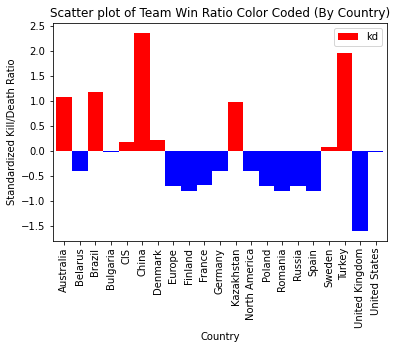

In [138]:
ax = temp.plot(kind='bar', x='teams', y='kd', title='Scatter plot of Team Win Ratio Color Coded (By Country)',
               width = 1, color = col)
ax.set_xlabel('Country')
ax.set_ylabel('Standardized Kill/Death Ratio')

plt.show()

## 2-2 팀별 승률(Winning rate) 추이 분석 

In [139]:
#시각화2
chanz = masterDF.groupby(['Team','Year'])['Outcome'].mean()
cha = chanz.to_frame()
cha['o'] = chanz.index.get_level_values('Team')
cha['f'] = chanz.index.get_level_values('Year')

cha = cha.reset_index(drop=True)
cha = cha.rename(columns={'Outcome':'Outcome', 'o':'Team', 'f':'Year'})


In [140]:
cha

,Outcome,Team,Year
0,0.623932,Astralis,2016
1,0.612150,Astralis,2017
2,0.589744,Cloud9,2014
3,0.613527,Cloud9,2015
4,0.658088,Cloud9,2016
5,0.633205,Cloud9,2017
6,0.536585,FaZe,2016
7,0.647303,FaZe,2017
8,0.511962,G2,2015
9,0.557940,G2,2016


In [141]:
ts = cha.groupby('Team')
names = ts['Team'].unique()
flat_names = [item for sublist in names for item in sublist]

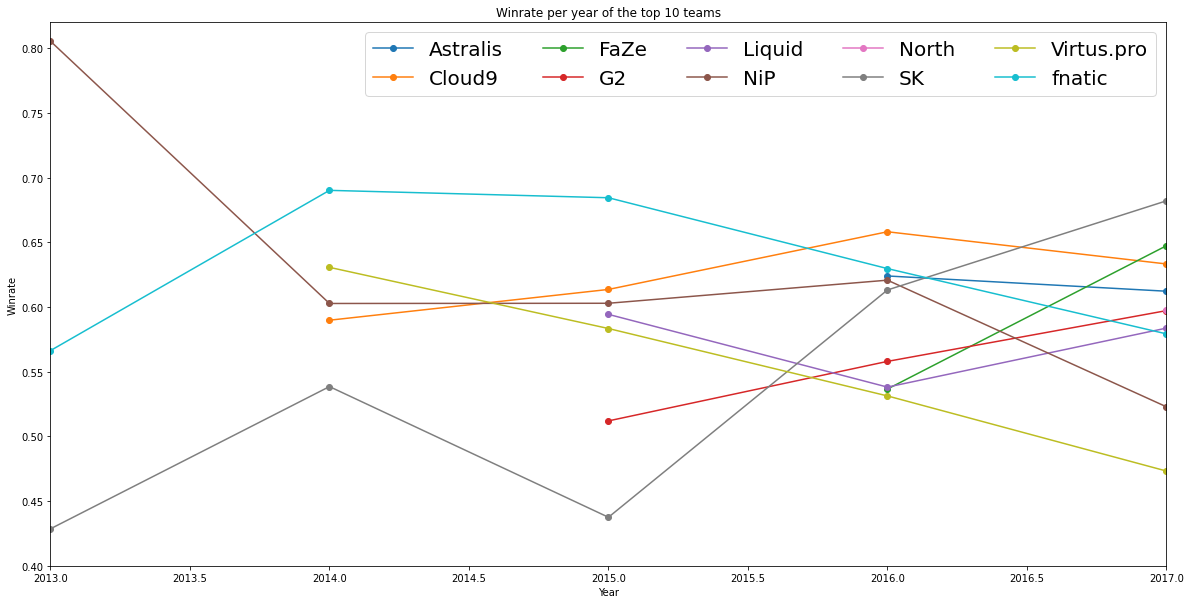

In [142]:
plt.figure(figsize = (20,10))
plt.xlim(2013,2017)
plt.ylim(.4, .82)
plt.title("Winrate per year of the top 10 teams")
plt.ylabel('Winrate')
plt.xlabel('Year')

for k, v in ts:
    plt.plot(v['Year'], v['Outcome'], marker='o')

plt.legend(flat_names, ncol=5, prop={'size':20})
plt.show()

In [143]:
wrs = ts.get_group('NiP')['Outcome'].tolist()
years = ['2012','2013','2014','2015','2016','2017']

for i in range(0,6):
    print("NiP winrate in", years[i], " : ", wrs[i])

NiP winrate in 2012  :  0.984375
NiP winrate in 2013  :  0.8053435114503816
NiP winrate in 2014  :  0.6026785714285714
NiP winrate in 2015  :  0.6028368794326241
NiP winrate in 2016  :  0.6206896551724138
NiP winrate in 2017  :  0.5228426395939086


In [144]:
import warnings
warnings.filterwarnings(action = 'ignore')

## 2-3 상위팀 소속 선수들의 킬/데스 평균 분석 

Means of K/D Difference per team
 Teams
Astralis        61.000000
Cloud9         329.428571
FaZe          1538.500000
G2             663.000000
Liquid         659.500000
North          325.437500
SK             321.555556
Virtus.pro     280.000000
fnatic        -127.000000
Name: K/D Differential, dtype: float64

Maxs of K/D Difference per team
 Teams
Astralis      1783
Cloud9        1585
FaZe          4690
G2            2282
Liquid        3577
North         3073
SK            2327
Virtus.pro    3325
fnatic         161
Name: K/D Differential, dtype: int64


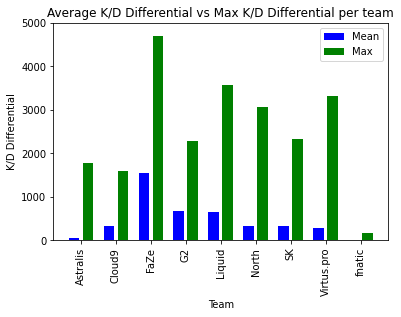

How much better each teams best player did versus average of players on the team
3.4212002243409985
20.78413699864804
32.80383795309169
29.053461875547764
18.437237908862176
10.590221282134722
13.818459628515495
8.421052631578947


In [146]:
#선수 킬뎃 시각화...
means = []
maxs = []
teams1 = players['Teams'].sort_values().unique()
stuff = players.groupby('Teams')

means = stuff.mean()
maxs = stuff.max()
means.columns = ['Maps', 'K/D Differential', 'K/D', 'Rating']
maxs.colums = ['Player', 'Maps', 'K/D Differential', 'K/D', 'Rating']

print("Means of K/D Difference per team\n", means['K/D Differential'])
print("\nMaxs of K/D Difference per team\n", maxs['K/D Differential'])

ax = plt.subplot(111)

ax.bar([.8,1.8,2.8,3.8,4.8,5.8,6.8,7.8,8.8],
       means['K/D Differential'], width = 0.3,color = 'b', align='center')
ax.bar([1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2, 9.2],
       maxs['K/D Differential'], width = 0.3,color = 'g', align='center')
plt.xticks([1,2,3,4,5,6,7,8,9], teams1, rotation='vertical')

ax.set_ylim([0,5000])
ax.legend(['Mean','Max'])
plt.title("Average K/D Differential vs Max K/D Differential per team")
plt.ylabel('K/D Differential')
plt.xlabel('Team')

plt.show()

me = means['K/D Differential'].tolist()
ma = maxs['K/D Differential'].tolist()

print("How much better each teams best player did versus average of players on the team")

for i in range(0,8):
    c = (me[i] / ma[i]) * 100
    print(c)

## 3. 이후 경기에 대한 머신러닝 예측

(데이터 오류로 정확한 결과 나오지 않음)

In [147]:

masterDF['Date'] = masterDF['Date'].apply(lambda x: x.toordinal())

In [155]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                       n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha = 0.1, 
                     color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', 
             label = "Training score")
    
    plt.legend(loc="best")
    return plt

europe = masterDF[(masterDF.Team == 'Australis') | (masterDF.Team == 'North') |
                 (masterDF.Team == 'G2') | (masterDF.Team == 'FaZe')]
america = masterDF[(masterDF.Team == 'Cloud9') | (masterDF.Team == 'Liquid') |
                  (masterDF.Team == 'SK')]
sweden = masterDF[(masterDF.Team == 'NiP') | (masterDF.Team == 'fnatic')]


In [149]:
europe

,Team,Date,Opponent,Map,W/L,Outcome,Year
1517,FaZe,736680,mousesports,Mirage,19 - 17,1,2017
1518,FaZe,736680,mousesports,Inferno,22 - 18,1,2017
1519,FaZe,736680,mousesports,Nuke,14 - 16,0,2017
1520,FaZe,736680,fnatic,Train,16 - 11,1,2017
1521,FaZe,736680,fnatic,Overpass,16 - 7,1,2017
...,...,...,...,...,...,...,...
7647,North,736354,GODSENT,Overpass,19 - 17,1,2017
7648,North,736354,G2,Overpass,16 - 9,1,2017
7649,North,736353,HellRaisers,Mirage,19 - 15,1,2017
7650,North,736352,fnatic,Cobblestone,13 - 16,0,2017


In [150]:
#여기서부터 다시 해보기ㅜ
eursvc = SVC()
amersvc = SVC()
swedsvc = SVC()

In [151]:
eursvc.fit(europe.Date.values.reshape((len(europe),1)), europe.Outcome)
amersvc.fit(america.Date.values.reshape((len(america),1)), america.Outcome)
swedsvc.fit(sweden.Date.values.reshape((len(sweden),1)), sweden.Outcome)

SVC()

In [152]:
europesvm = cross_val_score(eursvc, europe.Date.values.reshape((len(europe),1)), europe.Outcome, cv=10)
americasvm = cross_val_score(amersvc, america.Date.values.reshape((len(america),1)), america.Outcome, cv=10)
swedensvm = cross_val_score(swedsvc, sweden.Date.values.reshape((len(sweden),1)), sweden.Outcome, cv=10)

In [153]:
print("Linear SVM 10 Point Cross Validation On Europe Data")
print(europesvm)
print("\n")

print("Linear SVM 10 Point Cross Validation On America Data")
print(americasvm) 
print("\n")

print("Linear SVM 10 Point Cross Validation On Sweden Data")
print(swedensvm)


Linear SVM 10 Point Cross Validation On Europe Data
[0.57364341 0.57364341 0.57364341 0.578125   0.578125   0.578125
 0.578125   0.4375     0.5703125  0.5703125 ]


Linear SVM 10 Point Cross Validation On America Data
[0.6        0.6        0.6        0.6        0.60267857 0.60267857
 0.49107143 0.60267857 0.60267857 0.59821429]


Linear SVM 10 Point Cross Validation On Sweden Data
[0.65367965 0.64935065 0.64935065 0.64935065 0.64935065 0.64935065
 0.65217391 0.65217391 0.65217391 0.65217391]


In [154]:
print("Linear SVM Cross Mean and Standard Error For Europe Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (europesvm.mean(), europesvm.std() * 2))
print("\n")

print("Linear SVM Cross Mean and Standard Error For America Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (americasvm.mean(), americasvm.std() * 2))
print("\n")

print("Linear SVM Cross Mean and Standard Error For Europe Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (swedensvm.mean(), swedensvm.std() * 2))

Linear SVM Cross Mean and Standard Error For Europe Data
Accuracy: 0.56 (+/- 0.08)


Linear SVM Cross Mean and Standard Error For America Data
Accuracy: 0.59 (+/- 0.07)


Linear SVM Cross Mean and Standard Error For Europe Data
Accuracy: 0.65 (+/- 0.00)


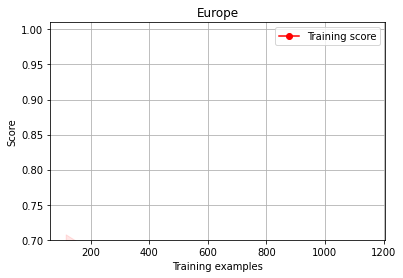

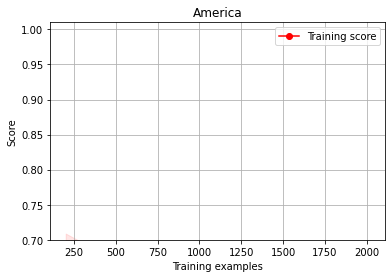

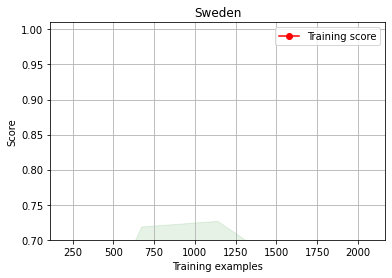

In [156]:
plot_learning_curve(eursvc, "Europe", europe.Date.values.reshape((len(europe),1)),
                   europe.Outcome, ylim=(0.7,1.01), cv=10, n_jobs=4)
plot_learning_curve(amersvc, "America", america.Date.values.reshape((len(america),1)),
                   america.Outcome, ylim=(0.7,1.01), cv=10, n_jobs=4)
plot_learning_curve(swedsvc, "Sweden", sweden.Date.values.reshape((len(sweden),1)), 
                    sweden.Outcome, ylim=(0.7,1.01), cv=10, n_jobs=4)

plt.show()

In [171]:
#올스타 팀으로 향후 250 게임 머신러닝 돌리기
ewincount = 0
awincount = 0
swincount = 0

for x in range(736681, 736681+250):
    if eursvc.predict([[x]]) == [1]:
        ewincount += 1

for x in range(736615, 736615+250):
    if amersvc.predict([[x]]) == [1]:
        awincount += 1

for x in range(736493, 736493+250):
    if swedsvc.predict([[x]]) == [1]:
        swincount += 1
        

In [172]:
ewincount

250

Predicted Outcome of Next 250 Games By Best European Teams


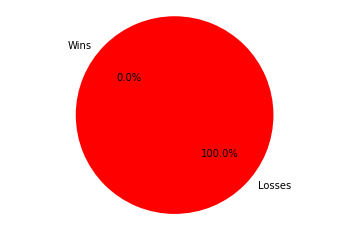

In [161]:
print("Predicted Outcome of Next 250 Games By Best European Teams")
plt.pie([ewincount, 250-ewincount], explode=(0,0), labels=['Wins','Losses'],
       colors = ['limegreen', 'red'], autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()


Predicted Outcome of Next 250 Games By Best American Teams (C9, Liquid, and SK)


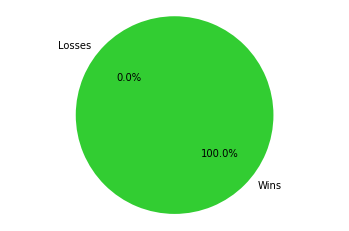


Predicted Outcome of Next 250 Games By Best Swedish Teams (NiP and fnatic)


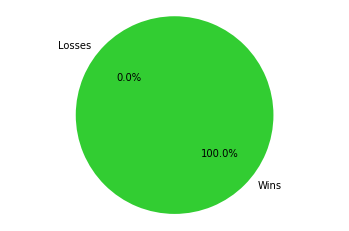

In [173]:
print("\nPredicted Outcome of Next 250 Games By Best American Teams (C9, Liquid, and SK)")
plt.pie([awincount, 250-awincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

print("\nPredicted Outcome of Next 250 Games By Best Swedish Teams (NiP and fnatic)")
plt.pie([swincount, 250-swincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()